In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
%matplotlib notebook

In [4]:
from gym_pendrogone.envs import Pendrogone_zero

In [5]:
def ez_plot(x_limits, y_limits, d):
    assert len(x_limits) == 2 and len(y_limits) == 2
    
    x = np.arange(x_limits[0], x_limits[1], d)
    y = np.arange(y_limits[0], y_limits[1], d)
    
    return np.meshgrid(x, y)

## Bonsai reward shping

In [6]:
def bonsai_RS_func(d, v):
    dist_r = 1 - d**0.4
    vel_discount = np.power((1 - np.maximum(v, 0.1)), 1 / np.maximum(d, 0.1))
    return vel_discount * dist_r

<IPython.core.display.Javascript object>


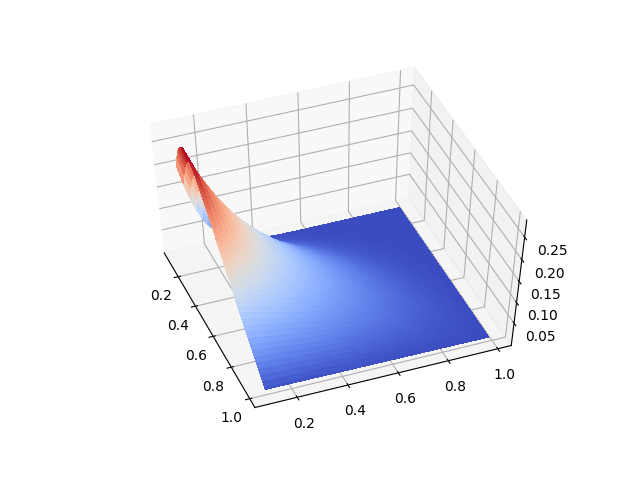

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = ez_plot([0.1, 1], [0.1, 1], 0.01)
Z = bonsai_RS_func(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [8]:
def pendrogone_RS_func(d, v):
    return Pendrogone_zero.reward_shaping(d, v)

<IPython.core.display.Javascript object>


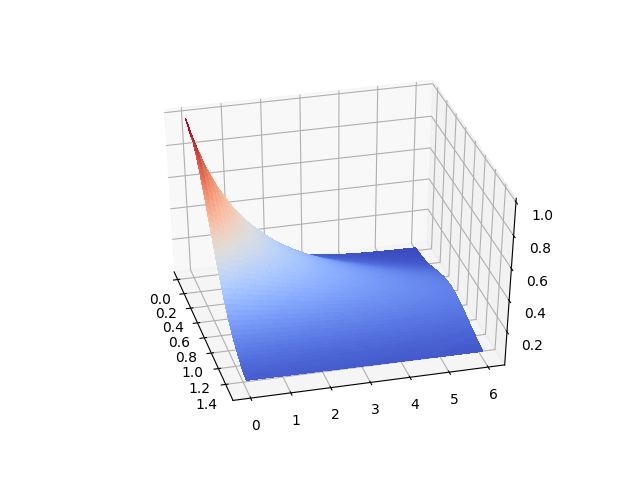

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = ez_plot([0, 1.5], [0, 6], 0.01)
Z = pendrogone_RS_func(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<IPython.core.display.Javascript object>


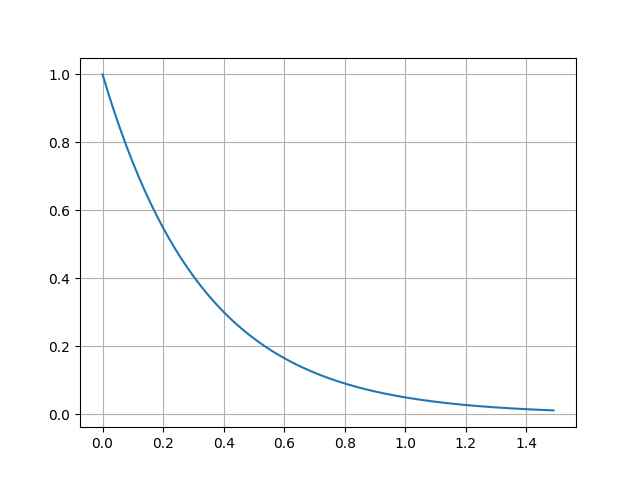

In [29]:
t = np.arange(0, 1.5, 0.01)
s = np.exp(- 3 * t)

fig = plt.figure()
plt.plot(t, s)
plt.grid()